## Multiclass Logistic Regression
#### We use the "digits" dataset available in SciKit_Learn to implement a multiclass logistic regression model able to classify the different images according to the numbers they represent.

In [100]:
# Import libraries

import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection;

Populating the interactive namespace from numpy and matplotlib


In [101]:
# Load the dataset

digits_df = datasets.load_digits()
print('Dataset Structure: ', dir(digits_df), '\n')
print('Dataset Size: ', digits_df.data.shape, '\n')
print('Pixel representation of the images: \n', digits_df.data)

Dataset Structure:  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names'] 

Dataset Size:  (1797, 64) 

Pixel representation of the images: 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


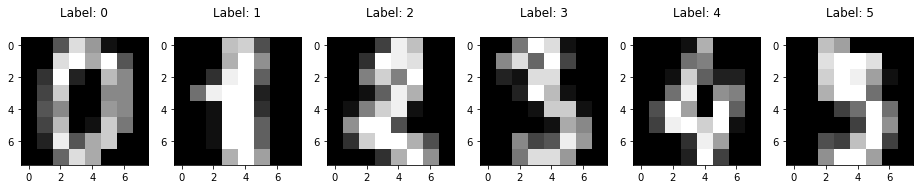

In [102]:
#Showing the first 5 images in the dataset

fig, ax = plt.subplots(1, 6, figsize=(16, 8))

for i in range(6):
    ax[i].imshow(digits_df.images[i])
    ax[i].set_title('Label: %s\n' % digits_df.target_names[i])

plt.show()

## Model

In [103]:
# Split dataset into train and test 

X = digits_df.data / 16   #Normalization to 1
y = digits_df.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

print('X_train = ', X_train.shape)
print('X_test  = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_train = ', y_test.shape)

X_train =  (1437, 64)
X_test  =  (360, 64)
y_train =  (1437,)
y_train =  (360,)


In [104]:
#Model Training

lm = linear_model.LogisticRegression(max_iter=15000)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

In [105]:
# testing

print('Predicted Value :', lm.predict([X_test[0]]))

print('Actual value %s' % (y_test[0]))

# Create prediction on the entire test data
pred = lm.predict(X_test)

Predicted Value : [1]
Actual value 1


In [106]:
# Model accuracy (total number of corect preductions over total number of data points)

lm.score(X_test, y_test)

0.9805555555555555

## Confusion Matrix

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]], dtype=int64)

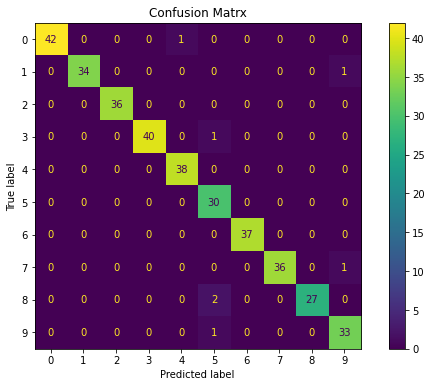

In [107]:
# matrice di confusione
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp = metrics.plot_confusion_matrix(
  lm, X_test, y_test, display_labels=digits_df.target_names, ax=ax)
disp.confusion_matrix

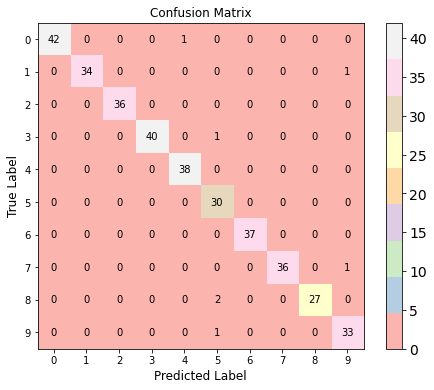

In [117]:
#EXTRA: Other way to plot the confusion matrix with heatmap
conf = confusion_matrix(pred,y_test)
fig, ax1=plt.subplots(figsize=(10,6))
im = plt.imshow(conf, cmap='Pastel1')
cbar = fig.colorbar(im,extend='neither',ax=ax1,fraction=0.1,pad=0.04)
cbar.ax.tick_params(labelsize=14)
plt.title('Confusion Matrix',fontsize=12)
plt.xlabel('Predicted Label',fontsize=12)
plt.yticks(range(0,10,1))
plt.ylabel('True Label',fontsize=12)
plt.xticks(range(0,10,1))

for (i,j), label in np.ndenumerate(conf):
    ax1.text(i,j,label,ha='center',va='center')

## Missclassified Images

In [122]:
index = 0
missclassifiedIndex = []
for predict, actual in zip(pred, y_test):
    if predict != actual:
        missclassifiedIndex.append(index)
    index +=1

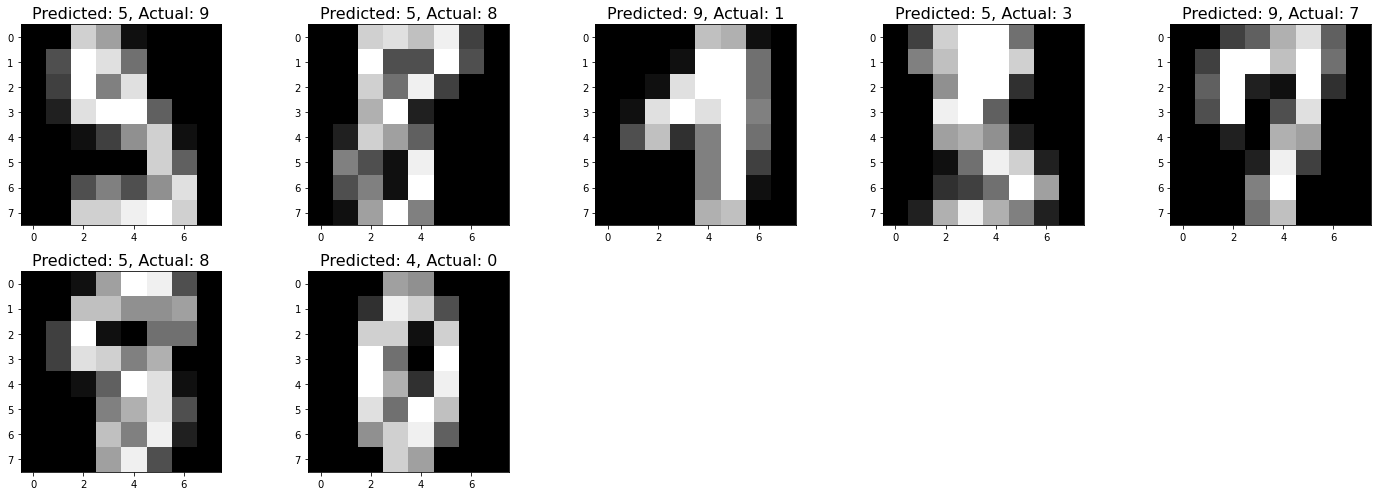

In [136]:
plt.figure(figsize=(20,7))
for plotIndex, wrong in enumerate(missclassifiedIndex[0:10]):
    plt.subplot(2,5,plotIndex+1)
    plt.tight_layout()
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(pred[wrong], y_test[wrong]), fontsize=16)